In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from plotnine import *
from dataprep.eda import plot, plot_correlation
from IPython.display import Image
pd.set_option('display.max_columns', None)

In [16]:
#survey quality
#https://drive.google.com/file/d/1KULMATLW_kbcq4TOyDgHmMpyRptoq-0y/view?usp=sharing

In [17]:
#meta=pd.read_csv("../../metadata.csv")#,sep="\t")
meta=pd.read_csv("../../data/INHS_corrected_2020.06.09.csv")

#annotated webform data
qual=pd.read_csv("../../data/hdrwebform_20200728.csv") 
meta
#df['Discounted_Price'] = df.apply(lambda row: row.Cost - (row.Cost * 0.1), axis = 1) 

meta['fileexists']=meta.apply(lambda x: \
                              os.path.exists(os.path.join("../../data/INHS_segmented_padded_fish/images",x['fileName'])),axis=1)
meta


fileName         Family        Genus  \
0       INHS_FISH_20096.JPG      Clupeidae        Alosa   
1       INHS_FISH_38236.JPG      Clupeidae        Alosa   
2       INHS_FISH_38418.JPG      Clupeidae        Alosa   
3       INHS_FISH_38440.JPG      Clupeidae        Alosa   
4       INHS_FISH_38781.JPG      Clupeidae        Alosa   
...                     ...            ...          ...   
23083   INHS_FISH_60802.jpg    Leuciscidae    Semotilus   
23084   INHS_FISH_65283.jpg    Leuciscidae    Semotilus   
23085  INHS_FISH_107123.jpg    Leuciscidae    Semotilus   
23086   INHS_FISH_66322.jpg  Triportheidae  Triportheus   
23087   INHS_FISH_85634.jpg       Umbridae        Umbra   

                scientificName catalogNumber  fixedCatalogNumber  fileexists  
0               Alosa alabamae         20096               20096        True  
1               Alosa alabamae         38236               38236        True  
2               Alosa alabamae         38418               38418        True  
3               Alosa alabamae         38440               38440        True  
4               Alosa alabamae         38781               38781        True  
...                        ...           ...                 ...         ...  
23083  Semotilus atromaculatus         60802               60802        True  
23084  Semotilus atromaculatus         65283               65283        True  
23085  Semotilus atromaculatus        107123              107123        True  
23086        Triportheus albus         66322               66322        True  
23087               Umbra limi         85634               85634        True  

[23088 rows x 7 columns]

In [18]:
list(qual)

['id',
 'image_name',
 'height',
 'width',
 'resolution',
 'if_fish',
 'if_ruler',
 'if_colorbar',
 'relative_path',
 'fish_number',
 'non_specimen_objects',
 'if_label',
 'if_overlapping',
 'specimen_angle',
 'specimen_view',
 'if_bent',
 'landmark_failures_number',
 'if_missing_parts',
 'brightness',
 'if_blur',
 'if_color_issue',
 'checked_flag',
 'specimen_angled',
 'specimen_viewing',
 'color_issues',
 'if_background_uniform',
 'if_parts_visible',
 'image_quality',
 'label_detailed',
 'if_each_fish_label',
 'if_fins_folded',
 'if_label_catalog_number_correct',
 'if_label_name_correct',
 'create_time',
 'update_time',
 'fixed_scientific_name',
 'scientific_name']

In [19]:
qual=qual.drop(columns=["fixed_scientific_name","scientific_name","resolution"]) #all NAN

In [20]:
moige=qual.set_index('image_name').join(meta.set_index('fileName'))
moige

id  height  \
INHS_FISH_100058.jpg           a424052b-cb7a-444c-ac03-44f1ec528d79    4016   
INHS_FISH_100447.jpg           fd5de4d6-293b-4c35-8143-03520aede735    4016   
INHS_FISH_100573.jpg           38cfee19-e48f-4713-ac90-e7d1b3fd752e    4016   
INHS_FISH_100834.jpg           fbd1d30b-e7fe-422c-a879-2ba719b21970    4016   
INHS_FISH_101465.jpg           73deb9d7-8b5f-4c4f-98bd-84b53ea981c3    4016   
...                                                             ...     ...   
INHS_FISH_99983.jpg            671b41a0-a658-4465-b3ea-4587e866177a    4016   
INHS_FISH_9999.jpg             d5c15b90-2472-419c-ae41-0c6fac12cb16    4016   
INHS_FISH_99992.jpg            14c3df45-759c-4be9-a87b-5bef0d24e3e2    4016   
INHS_FISH_99996.jpg            e4d4eadb-7327-429d-a7b0-1f1262c0df62    4016   
INHS_FISH_INHS_FISH_74821.jpg  871488d2-8eae-40ca-b036-a6c7a559f2e4    4016   

                               width  if_fish  if_ruler  if_colorbar  \
INHS_FISH_100058.jpg            6016     True      True        False   
INHS_FISH_100447.jpg            6016     True      True        False   
INHS_FISH_100573.jpg            6016     True      True        False   
INHS_FISH_100834.jpg            6016     True      True        False   
INHS_FISH_101465.jpg            6016     True      True        False   
...                              ...      ...       ...          ...   
INHS_FISH_99983.jpg             6016     True      True        False   
INHS_FISH_9999.jpg              6016     True      True        False   
INHS_FISH_99992.jpg             6016     True      True        False   
INHS_FISH_99996.jpg             6016     True      True        False   
INHS_FISH_INHS_FISH_74821.jpg   6016     True      True        False   

                                                     relative_path  \
INHS_FISH_100058.jpg                    /INHS/INHS_FISH_100058.jpg   
INHS_FISH_100447.jpg                    /INHS/INHS_FISH_100447.jpg   
INHS_FISH_100573.jpg                    /INHS/INHS_FISH_100573.jpg   
INHS_FISH_100834.jpg                    /INHS/INHS_FISH_100834.jpg   
INHS_FISH_101465.jpg                    /INHS/INHS_FISH_101465.jpg   
...                                                            ...   
INHS_FISH_99983.jpg                      /INHS/INHS_FISH_99983.jpg   
INHS_FISH_9999.jpg                        /INHS/INHS_FISH_9999.jpg   
INHS_FISH_99992.jpg                      /INHS/INHS_FISH_99992.jpg   
INHS_FISH_99996.jpg                      /INHS/INHS_FISH_99996.jpg   
INHS_FISH_INHS_FISH_74821.jpg  /INHS/INHS_FISH_INHS_FISH_74821.jpg   

                               fish_number non_specimen_objects  if_label  \
INHS_FISH_100058.jpg                     1                   no      True   
INHS_FISH_100447.jpg                     1                   no      True   
INHS_FISH_100573.jpg                     1                   no      True   
INHS_FISH_100834.jpg                     1                   no      True   
INHS_FISH_101465.jpg                     1                   no      True   
...                                    ...                  ...       ...   
INHS_FISH_99983.jpg                      1                   no      True   
INHS_FISH_9999.jpg                       1                   no      True   
INHS_FISH_99992.jpg                      1                   no      True   
INHS_FISH_99996.jpg                      1                   no      True   
INHS_FISH_INHS_FISH_74821.jpg            1                   no      True   

                               if_overlapping specimen_angle specimen_view  \
INHS_FISH_100058.jpg                    False            NaN           NaN   
INHS_FISH_100447.jpg                    False            NaN           NaN   
INHS_FISH_100573.jpg                    False            NaN           NaN   
INHS_FISH_100834.jpg                    False            NaN           NaN   
INHS_FISH_101465.jpg                    False            NaN           NaN   
...              

In [21]:
plot(moige)

In [22]:
moige['if_background_uniform']

INHS_FISH_100058.jpg             False
INHS_FISH_100447.jpg              True
INHS_FISH_100573.jpg              True
INHS_FISH_100834.jpg             False
INHS_FISH_101465.jpg             False
                                 ...  
INHS_FISH_99983.jpg               True
INHS_FISH_9999.jpg                True
INHS_FISH_99992.jpg              False
INHS_FISH_99996.jpg               True
INHS_FISH_INHS_FISH_74821.jpg     True
Name: if_background_uniform, Length: 1936, dtype: bool

In [23]:
for incol in [col for col in moige if col.startswith('if')]:
    moige[incol] = moige[incol].astype(float)

In [24]:
len(moige['Genus'].unique())

19

In [25]:
df_num = moige.select_dtypes(include = ['float64', 'int64'])
plot_correlation(df_num)

/home/jnl47/Documents/dev/HGNN/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
/home/jnl47/Documents/dev/HGNN/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
/home/jnl47/Documents/dev/HGNN/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
/home/jnl47/Documents/dev/HGNN/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide


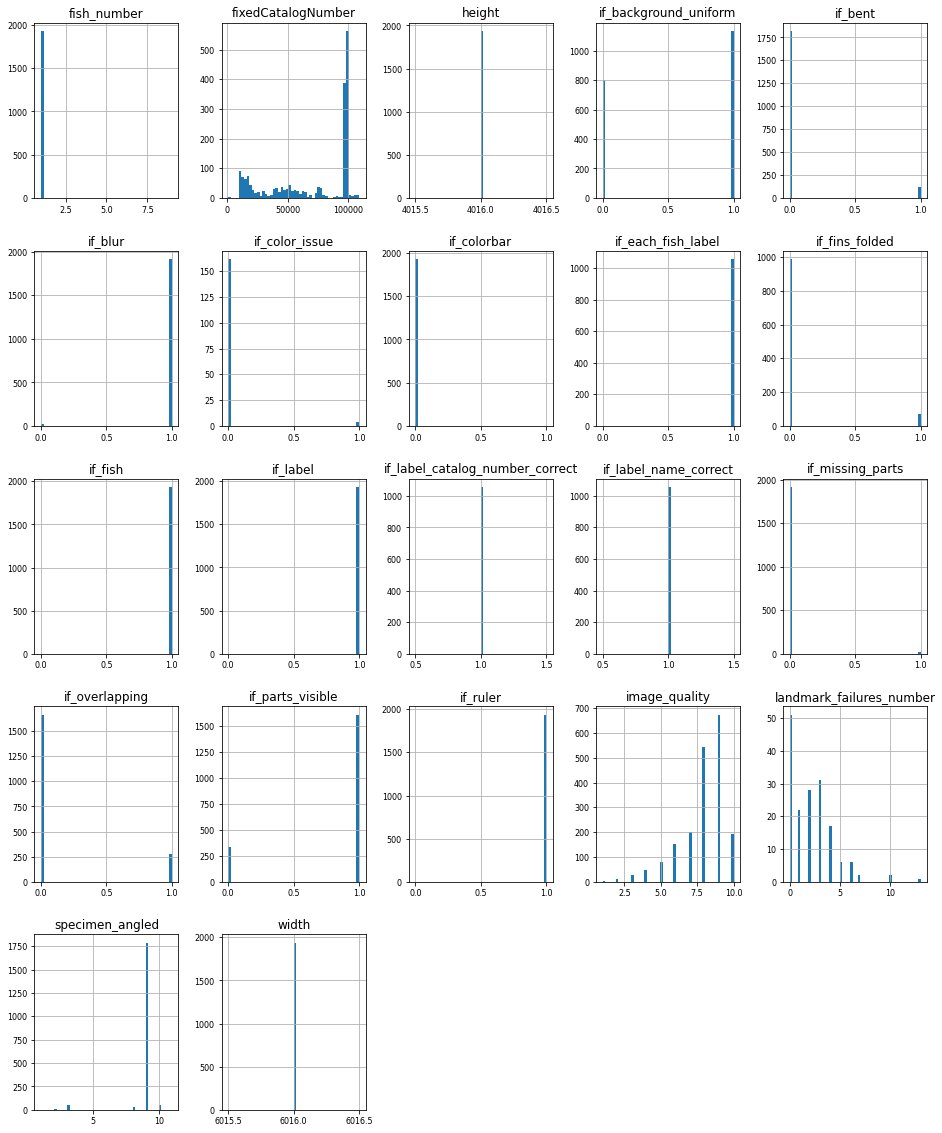

In [26]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

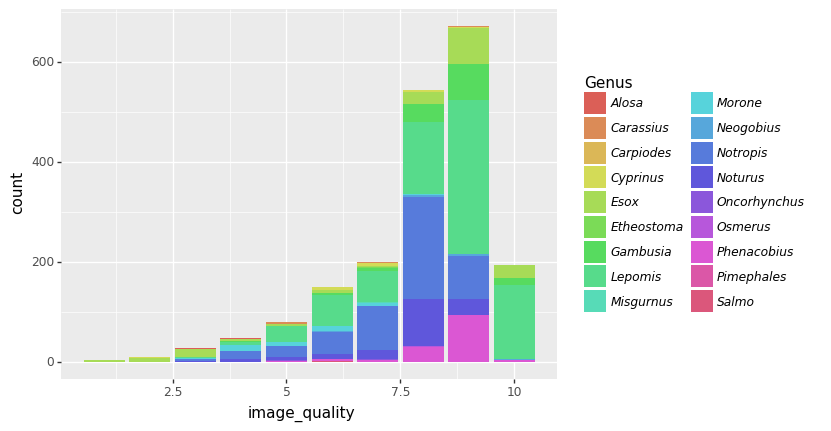

<ggplot: (8753735526177)>

In [29]:
#https://stackoverflow.com/questions/18400432/creating-multi-column-legend-in-ggplot
ggplot(moige[moige.Genus.notnull()],aes('image_quality',fill = 'Genus')) +  \
geom_bar(stat = 'count') +  \
theme(legend_text = element_text(face = "italic")) + \
guides(fill=guide_legend(ncol=2))

In [33]:
moige['above_median_image_quality']=moige['image_quality']>=np.nanmedian(moige['image_quality'])

In [34]:
moige['above_median_image_quality']

INHS_FISH_100058.jpg              True
INHS_FISH_100447.jpg              True
INHS_FISH_100573.jpg              True
INHS_FISH_100834.jpg              True
INHS_FISH_101465.jpg              True
                                 ...  
INHS_FISH_99983.jpg               True
INHS_FISH_9999.jpg                True
INHS_FISH_99992.jpg               True
INHS_FISH_99996.jpg              False
INHS_FISH_INHS_FISH_74821.jpg     True
Name: above_median_image_quality, Length: 1936, dtype: bool

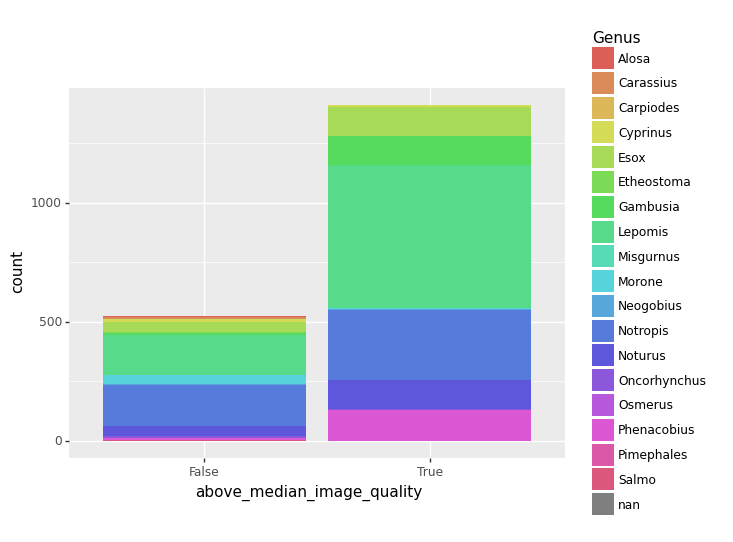

<ggplot: (8753720401521)>

In [35]:
ggplot(moige,aes('above_median_image_quality',fill = 'Genus')) + geom_bar(stat = 'count')

In [36]:
np.nanmedian(moige['image_quality'])

8.0

In [37]:
good_ifs = ['if_background_uniform','if_blur','if_parts_visible','if_label']
bad_ifs = ['if_bent','if_color_issue','if_fins_folded','if_missing_parts','if_overlapping']

In [38]:
#be careful
for col in bad_ifs:
    moige[col] = -moige[col]

In [39]:
moige['qualSums']=moige[good_ifs].sum(axis=1)

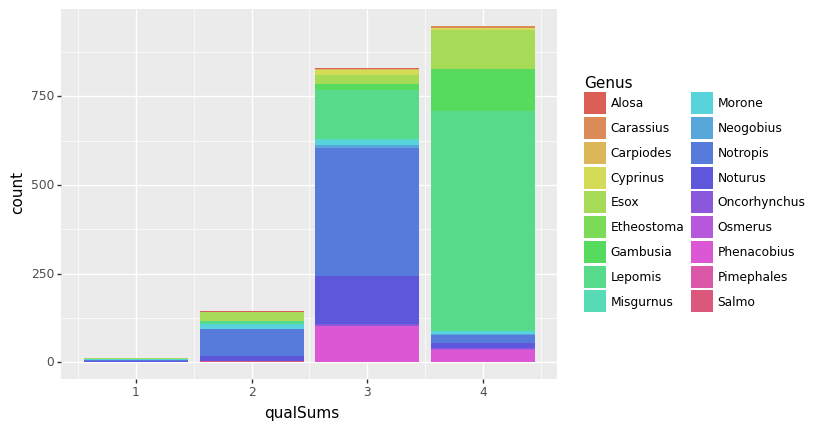

<ggplot: (8753734800377)>

In [40]:
ggplot(moige[moige['Genus'].notna()],aes('qualSums',fill = 'Genus')) + geom_bar(stat = 'count') + guides(fill=guide_legend(ncol=2))

In [41]:
moige[moige['Genus'].notna()]

id  height  width  \
INHS_FISH_100058.jpg  a424052b-cb7a-444c-ac03-44f1ec528d79    4016   6016   
INHS_FISH_100447.jpg  fd5de4d6-293b-4c35-8143-03520aede735    4016   6016   
INHS_FISH_100573.jpg  38cfee19-e48f-4713-ac90-e7d1b3fd752e    4016   6016   
INHS_FISH_100834.jpg  fbd1d30b-e7fe-422c-a879-2ba719b21970    4016   6016   
INHS_FISH_101465.jpg  73deb9d7-8b5f-4c4f-98bd-84b53ea981c3    4016   6016   
...                                                    ...     ...    ...   
INHS_FISH_99982.jpg   e51f980e-b1e4-4d02-a07c-7d5c9865292e    4016   6016   
INHS_FISH_99983.jpg   671b41a0-a658-4465-b3ea-4587e866177a    4016   6016   
INHS_FISH_9999.jpg    d5c15b90-2472-419c-ae41-0c6fac12cb16    4016   6016   
INHS_FISH_99992.jpg   14c3df45-759c-4be9-a87b-5bef0d24e3e2    4016   6016   
INHS_FISH_99996.jpg   e4d4eadb-7327-429d-a7b0-1f1262c0df62    4016   6016   

                      if_fish  if_ruler  if_colorbar  \
INHS_FISH_100058.jpg      1.0       1.0          0.0   
INHS_FISH_100447.jpg      1.0       1.0          0.0   
INHS_FISH_100573.jpg      1.0       1.0          0.0   
INHS_FISH_100834.jpg      1.0       1.0          0.0   
INHS_FISH_101465.jpg      1.0       1.0          0.0   
...                       ...       ...          ...   
INHS_FISH_99982.jpg       1.0       1.0          0.0   
INHS_FISH_99983.jpg       1.0       1.0          0.0   
INHS_FISH_9999.jpg        1.0       1.0          0.0   
INHS_FISH_99992.jpg       1.0       1.0          0.0   
INHS_FISH_99996.jpg       1.0       1.0          0.0   

                                   relative_path  fish_number  \
INHS_FISH_100058.jpg  /INHS/INHS_FISH_100058.jpg            1   
INHS_FISH_100447.jpg  /INHS/INHS_FISH_100447.jpg            1   
INHS_FISH_100573.jpg  /INHS/INHS_FISH_100573.jpg            1   
INHS_FISH_100834.jpg  /INHS/INHS_FISH_100834.jpg            1   
INHS_FISH_101465.jpg  /INHS/INHS_FISH_101465.jpg            1   
...                                          ...          ...   
INHS_FISH_99982.jpg    /INHS/INHS_FISH_99982.jpg            1   
INHS_FISH_99983.jpg    /INHS/INHS_FISH_99983.jpg            1   
INHS_FISH_9999.jpg      /INHS/INHS_FISH_9999.jpg            1   
INHS_FISH_99992.jpg    /INHS/INHS_FISH_99992.jpg            1   
INHS_FISH_99996.jpg    /INHS/INHS_FISH_99996.jpg            1   

                     non_specimen_objects  if_label  if_overlapping  \
INHS_FISH_100058.jpg                   no       1.0            -0.0   
INHS_FISH_100447.jpg                   no       1.0            -0.0   
INHS_FISH_100573.jpg                   no       1.0            -0.0   
INHS_FISH_100834.jpg                   no       1.0            -0.0   
INHS_FISH_101465.jpg                   no       1.0            -0.0   
...                                   ...       ...             ...   
INHS_FISH_99982.jpg                    no       1.0            -0.0   
INHS_FISH_99983.jpg                    no       1.0            -0.0   
INHS_FISH_9999.jpg                     no       1.0            -0.0   
INHS_FISH_99992.jpg                    no       1.0            -0.0   
INHS_FISH_99996.jpg                    no       1.0            -0.0   

                     specimen_angle specimen_view  if_bent  \
INHS_FISH_100058.jpg            NaN           NaN     -0.0   
INHS_FISH_100447.jpg            NaN           NaN     -0.0   
INHS_FISH_100573.jpg            NaN           NaN     -0.0   
INHS_FISH_100834.jpg            NaN           NaN     -0.0   
INHS_FISH_101465.jpg            NaN           NaN     -0.0   
...                             ...           ...      ...   
INHS_FISH_99982.jpg            Left          Left     -0.0   
INHS_FISH_99983.jpg            Left          Left     -0.0   
INHS_FISH_9999.jpg             Left          Left     -0.0   
INHS_FISH_99992.jpg            Left          Left     -0.0   
INHS_FISH_99996.jpg            Left          Left     -0.0   

                      landmark_failures_number  if_missing_parts brightness  \


In [42]:
moige[moige.qualSums==1]

id  height  width  \
INHS_FISH_97334.jpg    8d0e5e60-0070-4af2-9c31-6d5b3cc7b45e    4016   6016   
INHS_FISH_97693.jpg    e12c9d59-e1d2-475a-ae52-48d7a7cdd655    4016   6016   
INHS_FISH_97817.jpg    b137a0ae-f3a2-4076-bda5-6ec571080cae    4016   6016   
INHS_FISH_97848_2.jpg  e5d6a612-6c99-44cd-bb1e-a2074cb1e8d9    4016   6016   
INHS_FISH_98484.jpg    763bbceb-0e97-49b1-89a3-fe05f1ab4a4b    4016   6016   
INHS_FISH_98579.jpg    c403cdd5-79de-4bdd-8794-44ad55b8a527    4016   6016   
INHS_FISH_98713.jpg    6567d61e-3d18-4440-b334-e71ab56aaefa    4016   6016   
INHS_FISH_98716.jpg    e6479c79-97ee-4be1-a114-1fe3b4144d22    4016   6016   
INHS_FISH_99106.jpg    afbe231d-8986-4ba6-bfbd-3a37198d9baf    4016   6016   
INHS_FISH_99118.jpg    2d86bfd4-9e10-42f0-8552-9fcf009d0786    4016   6016   
INHS_FISH_99332.jpg    c06aecb9-fbae-4eb8-b01d-ddddd54b4b88    4016   6016   
INHS_FISH_99450.jpg    6d68640c-90d5-40f9-b1ef-3b1b91e31291    4016   6016   

                       if_fish  if_ruler  if_colorbar  \
INHS_FISH_97334.jpg        1.0       1.0          0.0   
INHS_FISH_97693.jpg        1.0       1.0          0.0   
INHS_FISH_97817.jpg        1.0       1.0          0.0   
INHS_FISH_97848_2.jpg      1.0       1.0          0.0   
INHS_FISH_98484.jpg        1.0       1.0          0.0   
INHS_FISH_98579.jpg        1.0       1.0          0.0   
INHS_FISH_98713.jpg        1.0       1.0          0.0   
INHS_FISH_98716.jpg        1.0       1.0          0.0   
INHS_FISH_99106.jpg        1.0       1.0          0.0   
INHS_FISH_99118.jpg        1.0       1.0          0.0   
INHS_FISH_99332.jpg        1.0       1.0          0.0   
INHS_FISH_99450.jpg        1.0       1.0          0.0   

                                     relative_path  fish_number  \
INHS_FISH_97334.jpg      /INHS/INHS_FISH_97334.jpg            1   
INHS_FISH_97693.jpg      /INHS/INHS_FISH_97693.jpg            1   
INHS_FISH_97817.jpg      /INHS/INHS_FISH_97817.jpg            1   
INHS_FISH_97848_2.jpg  /INHS/INHS_FISH_97848_2.jpg            1   
INHS_FISH_98484.jpg      /INHS/INHS_FISH_98484.jpg            1   
INHS_FISH_98579.jpg      /INHS/INHS_FISH_98579.jpg            1   
INHS_FISH_98713.jpg      /INHS/INHS_FISH_98713.jpg            1   
INHS_FISH_98716.jpg      /INHS/INHS_FISH_98716.jpg            1   
INHS_FISH_99106.jpg      /INHS/INHS_FISH_99106.jpg            1   
INHS_FISH_99118.jpg      /INHS/INHS_FISH_99118.jpg            1   
INHS_FISH_99332.jpg      /INHS/INHS_FISH_99332.jpg            1   
INHS_FISH_99450.jpg      /INHS/INHS_FISH_99450.jpg            1   

                      non_specimen_objects  if_label  if_overlapping  \
INHS_FISH_97334.jpg                  twine       0.0            -1.0   
INHS_FISH_97693.jpg             twine, tag       0.0            -1.0   
INHS_FISH_97817.jpg            twine, tags       1.0            -1.0   
INHS_FISH_97848_2.jpg           twine, tag       0.0            -1.0   
INHS_FISH_98484.jpg                     no       1.0            -0.0   
INHS_FISH_98579.jpg                     no       1.0            -0.0   
INHS_FISH_98713.jpg                     no       1.0            -0.0   
INHS_FISH_98716.jpg        twine, tag, lid       1.0            -1.0   
INHS_FISH_99106.jpg        twine, tag, lid       0.0            -1.0   
INHS_FISH_99118.jpg            twine, tags       1.0            -1.0   
INHS_FISH_99332.jpg                     no       1.0            -0.0   
INHS_FISH_99450.jpg                     no       1.0            -0.0   

                      specimen_angle specimen_view  if_bent  \
INHS_FISH_97334.jpg              NaN           NaN     -1.0   
INHS_FISH_97693.jpg              NaN           NaN     -1.0   
INHS_FISH_97817.jpg              NaN           NaN     -1.0   
INHS_FISH_97848_2.jpg            NaN           NaN     -1.0   
INHS_FISH_98484.jpg              NaN           NaN     -0.0   
INHS_FISH_98579.jpg              NaN           NaN     -1.0   
INHS_FISH_98713.jpg              NaN           NaN

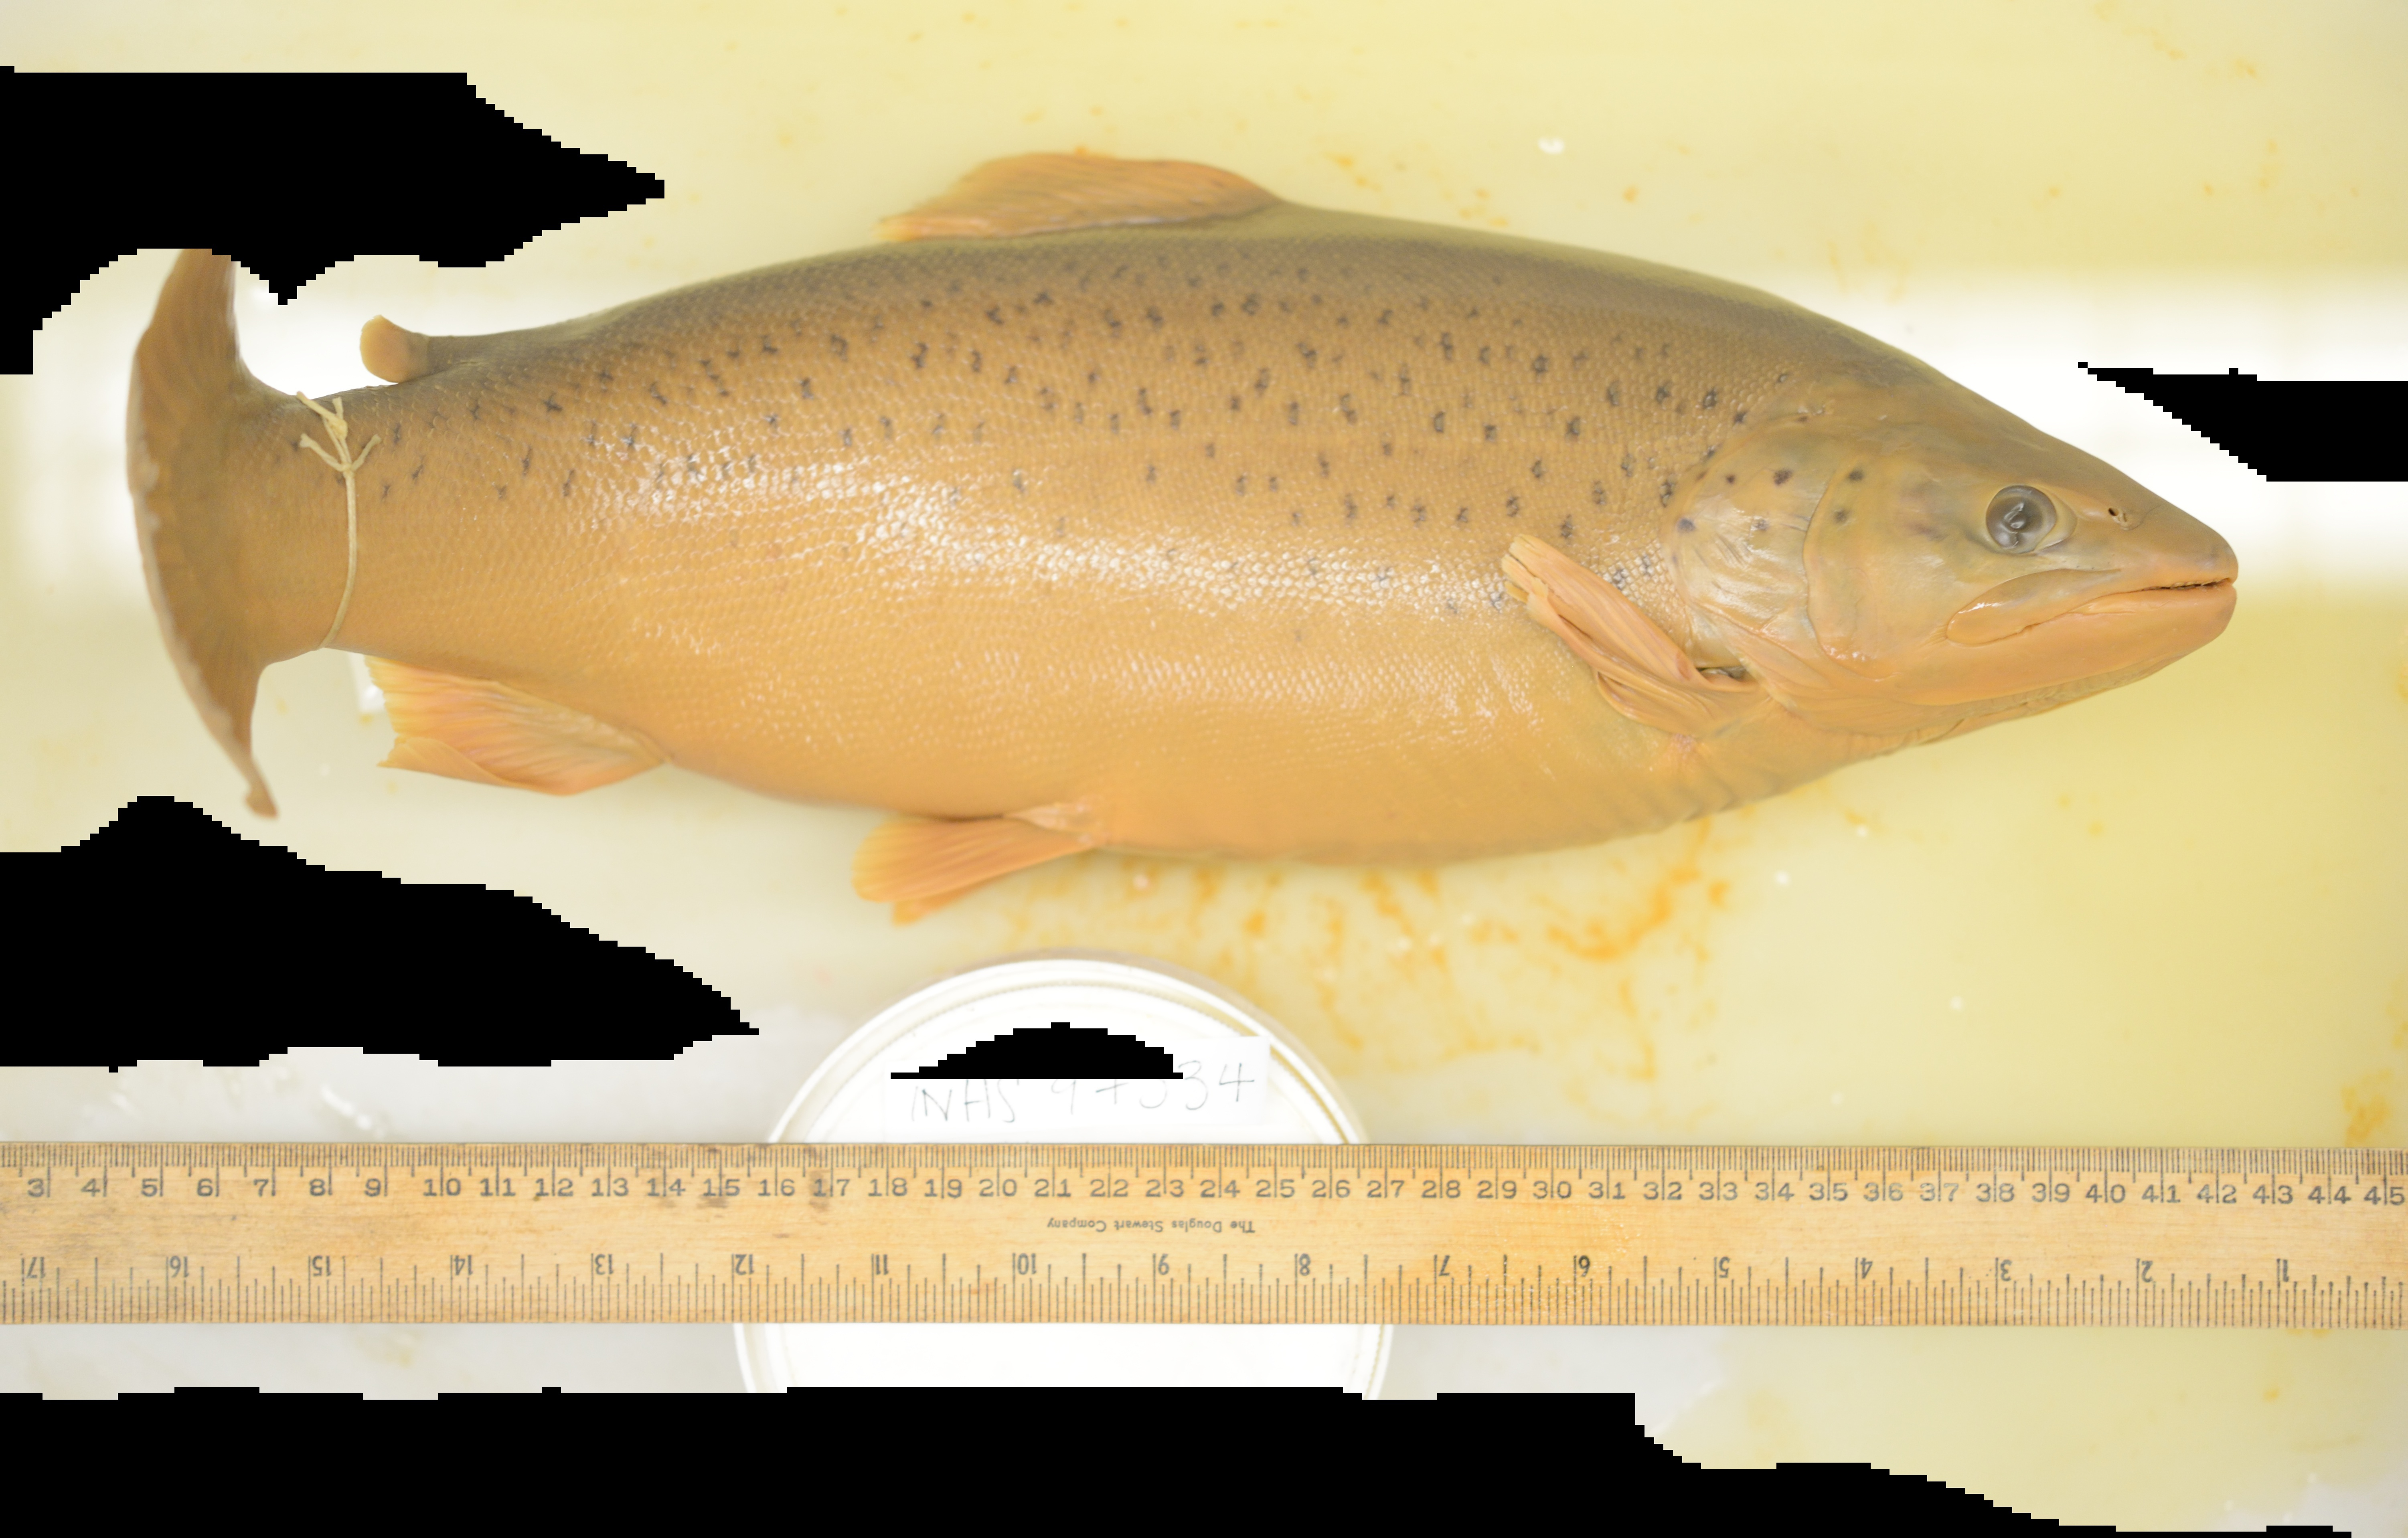

In [43]:
Image(filename=os.path.join("../../data/INHS_segmented_padded_fish/images/INHS_FISH_97334.jpg"))

In [44]:
# counts of Etheostomas
moige['Genus']

INHS_FISH_100058.jpg              Noturus
INHS_FISH_100447.jpg              Noturus
INHS_FISH_100573.jpg              Noturus
INHS_FISH_100834.jpg              Noturus
INHS_FISH_101465.jpg              Noturus
                                   ...   
INHS_FISH_99983.jpg               Lepomis
INHS_FISH_9999.jpg                Lepomis
INHS_FISH_99992.jpg              Notropis
INHS_FISH_99996.jpg               Noturus
INHS_FISH_INHS_FISH_74821.jpg         NaN
Name: Genus, Length: 1936, dtype: object

In [45]:
moige['highiq'] = moige.image_quality>8
moige['lowiq'] = moige.image_quality<=8
moige['highqs'] = moige.image_quality>8
moige['lowqs'] = moige.image_quality<=8


#display mean qualSums and quality scores for each genera
moige_by_iq=moige \
.groupby('Genus') \
.agg(count=('id','size'), \
     mean_iq=('image_quality','mean'), \
     mean_qualSums=('qualSums','mean'), \
     gt_med_iq=('highiq','sum'), \
    lte_med_iq=('lowiq','sum')) \
.sort_values(by=['mean_iq','count', 'mean_qualSums'], ascending=False) \
.reset_index()
#df = df.groupby('source') \
#       .agg(count=('text', 'size'), mean_sent=('sent', 'mean')) \
#       .reset_index()
#print (df)
moige_by_iq

Genus  count   mean_iq  mean_qualSums  gt_med_iq  lte_med_iq
0     Pimephales      1  9.000000       4.000000        1.0         0.0
1    Phenacobius    137  8.627737       3.233577       97.0        40.0
2       Gambusia    133  8.578947       3.887218       85.0        48.0
3        Osmerus      2  8.500000       4.000000        1.0         1.0
4        Lepomis    768  8.365885       3.799479      458.0       310.0
5        Noturus    166  7.608434       3.000000       31.0       135.0
6           Esox    165  7.587879       3.484848       97.0        68.0
7       Notropis    464  7.508621       2.868534       88.0       376.0
8      Misgurnus      2  7.500000       3.000000        0.0         2.0
9      Neogobius     12  7.416667       3.166667        4.0         8.0
10     Carpiodes      1  7.000000       3.000000        0.0         1.0
11    Etheostoma      1  7.000000       3.000000        0.0         1.0
12      Cyprinus     20  6.950000       3.300000        3.0        17.0
13     Carassius      7  6.285714       3.428571        1.0         6.0
14  Oncorhynchus      7  6.142857       3.000000        0.0         7.0
15         Salmo      5  5.600000       2.200000        0.0         5.0
16        Morone     39  5.256410       2.717949        0.0        39.0
17         Alosa      5  3.600000       2.400000        0.0         5.0

In [46]:
big_genera=moige.groupby('Genus').agg('size')[moige.groupby('Genus').agg('size')>10].keys()

moige_genusbyiq=pd.Categorical(moige['Genus'],categories=moige_by_iq.Genus.tolist())
moige=moige.assign(genusbyiq=moige_genusbyiq)

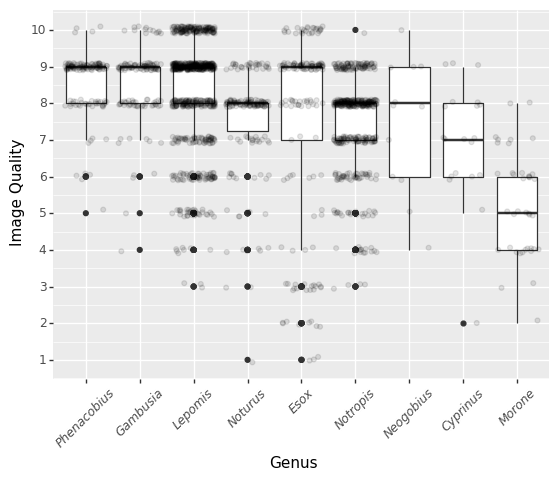

<ggplot: (8753734808985)>

In [48]:
big_genera=moige.groupby('Genus').agg('size')[moige.groupby('Genus').agg('size')>10].keys()
big_genera_mask=moige.Genus.isin(big_genera)
big_moige=moige[big_genera_mask]


# manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()
# manufacturer_cat = pd.Categorical(mpg['manufacturer'], categories=manufacturer_list)

# # assign to a new column in the DataFrame
# mpg = mpg.assign(manufacturer_cat = manufacturer_cat)

# (ggplot(mpg)
#  + aes(x='manufacturer_cat')
#  + geom_bar(size=20)
#  + coord_flip()
#  + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
# )


ggplot(big_moige,aes('genusbyiq','image_quality'))+geom_boxplot() \
+ geom_jitter(alpha=0.1,height=0.1) \
+ theme(axis_text_x=element_text(angle=45,face = "italic")) \
+ theme(legend_text = element_text(face = "italic")) \
+ scale_y_continuous(breaks = [0,1,2,3,4,5,6,7,8,9,10]) \
+ xlab('Genus') \
+ ylab('Image Quality')

In [51]:
moige['Genus']

id
a424052b-cb7a-444c-ac03-44f1ec528d79     Noturus
fd5de4d6-293b-4c35-8143-03520aede735     Noturus
38cfee19-e48f-4713-ac90-e7d1b3fd752e     Noturus
fbd1d30b-e7fe-422c-a879-2ba719b21970     Noturus
73deb9d7-8b5f-4c4f-98bd-84b53ea981c3     Noturus
                                          ...   
671b41a0-a658-4465-b3ea-4587e866177a     Lepomis
d5c15b90-2472-419c-ae41-0c6fac12cb16     Lepomis
14c3df45-759c-4be9-a87b-5bef0d24e3e2    Notropis
e4d4eadb-7327-429d-a7b0-1f1262c0df62     Noturus
871488d2-8eae-40ca-b036-a6c7a559f2e4         NaN
Name: Genus, Length: 1936, dtype: object

In [29]:
np.nanmedian(moige['qualSums'])

3.0

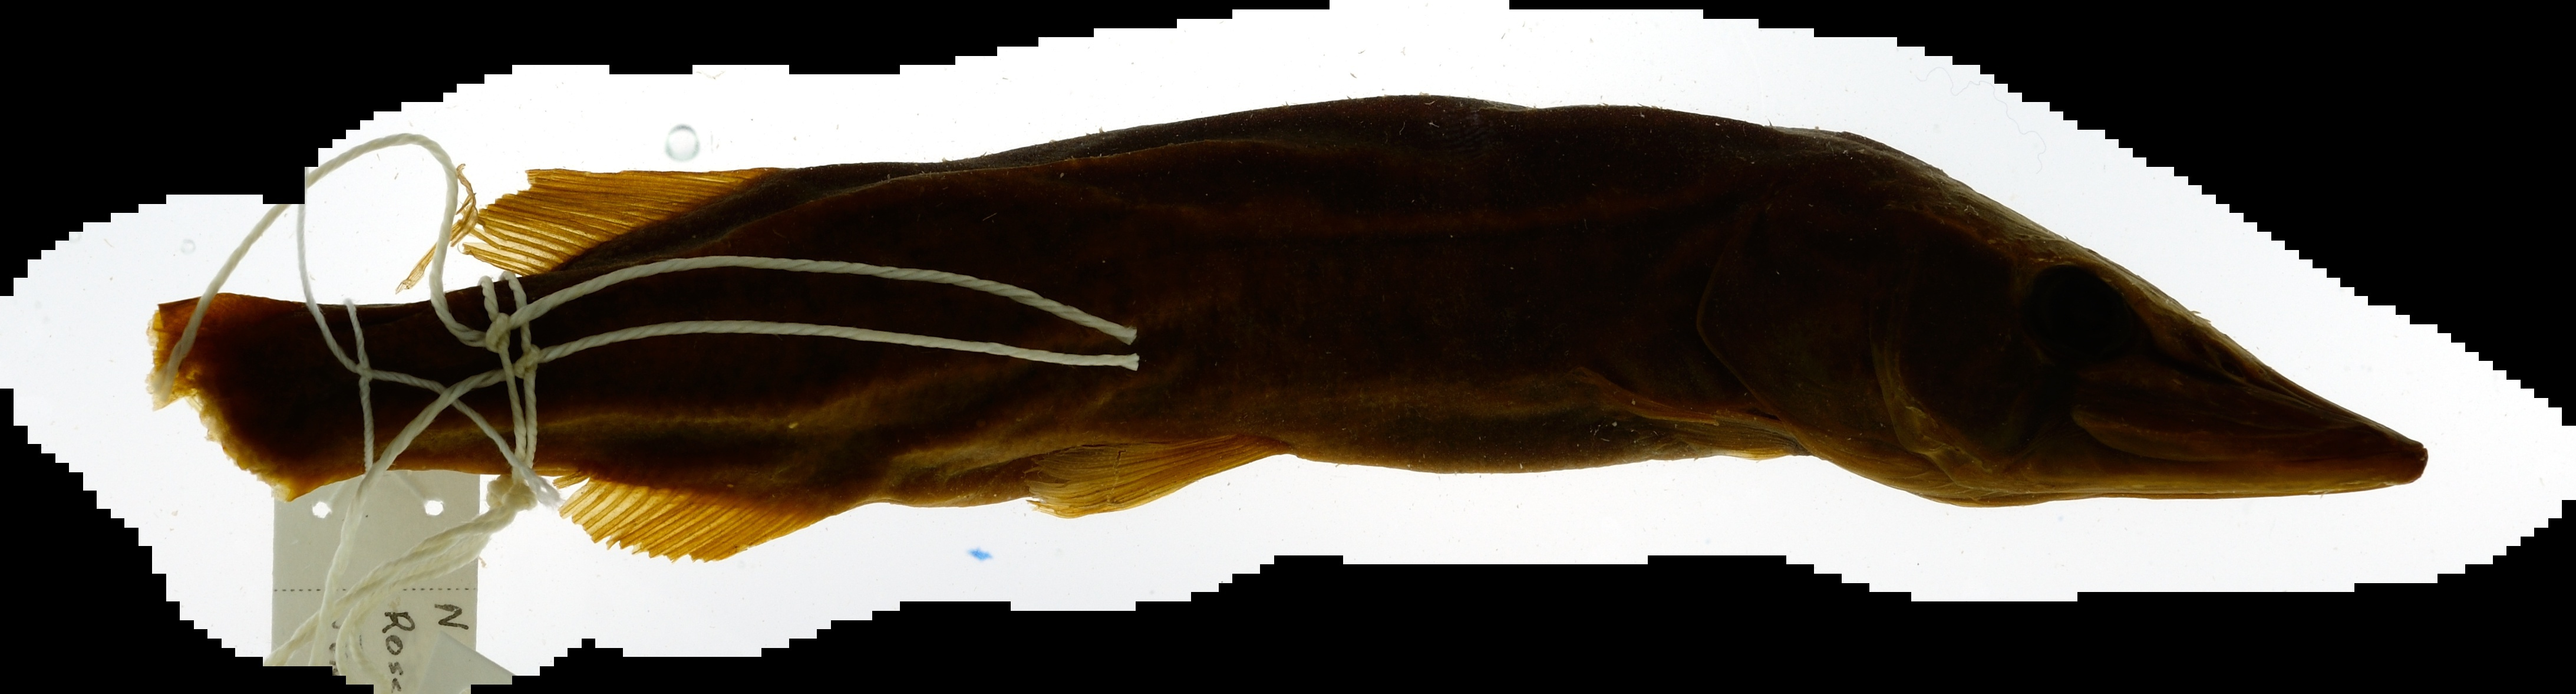

In [30]:
#think about fetching these in a more orderly fashion
#import json
#with open("../../experiments/smegma/params.json") as file:
#    content=json.load(file)

#let's go with the 3rd fish
badThirdFish=moige[moige.image_quality<2].index[2]
Image(filename=os.path.join("../../data/INHS_segmented_padded_fish/images/",badThirdFish))

In [31]:
badSci=moige[moige.image_quality<2]['scientificName'][2]
badSci

'Esox americanus'

In [32]:
goodComplement=moige[(moige.scientificName==badSci) & (moige.image_quality>9)].index[0]

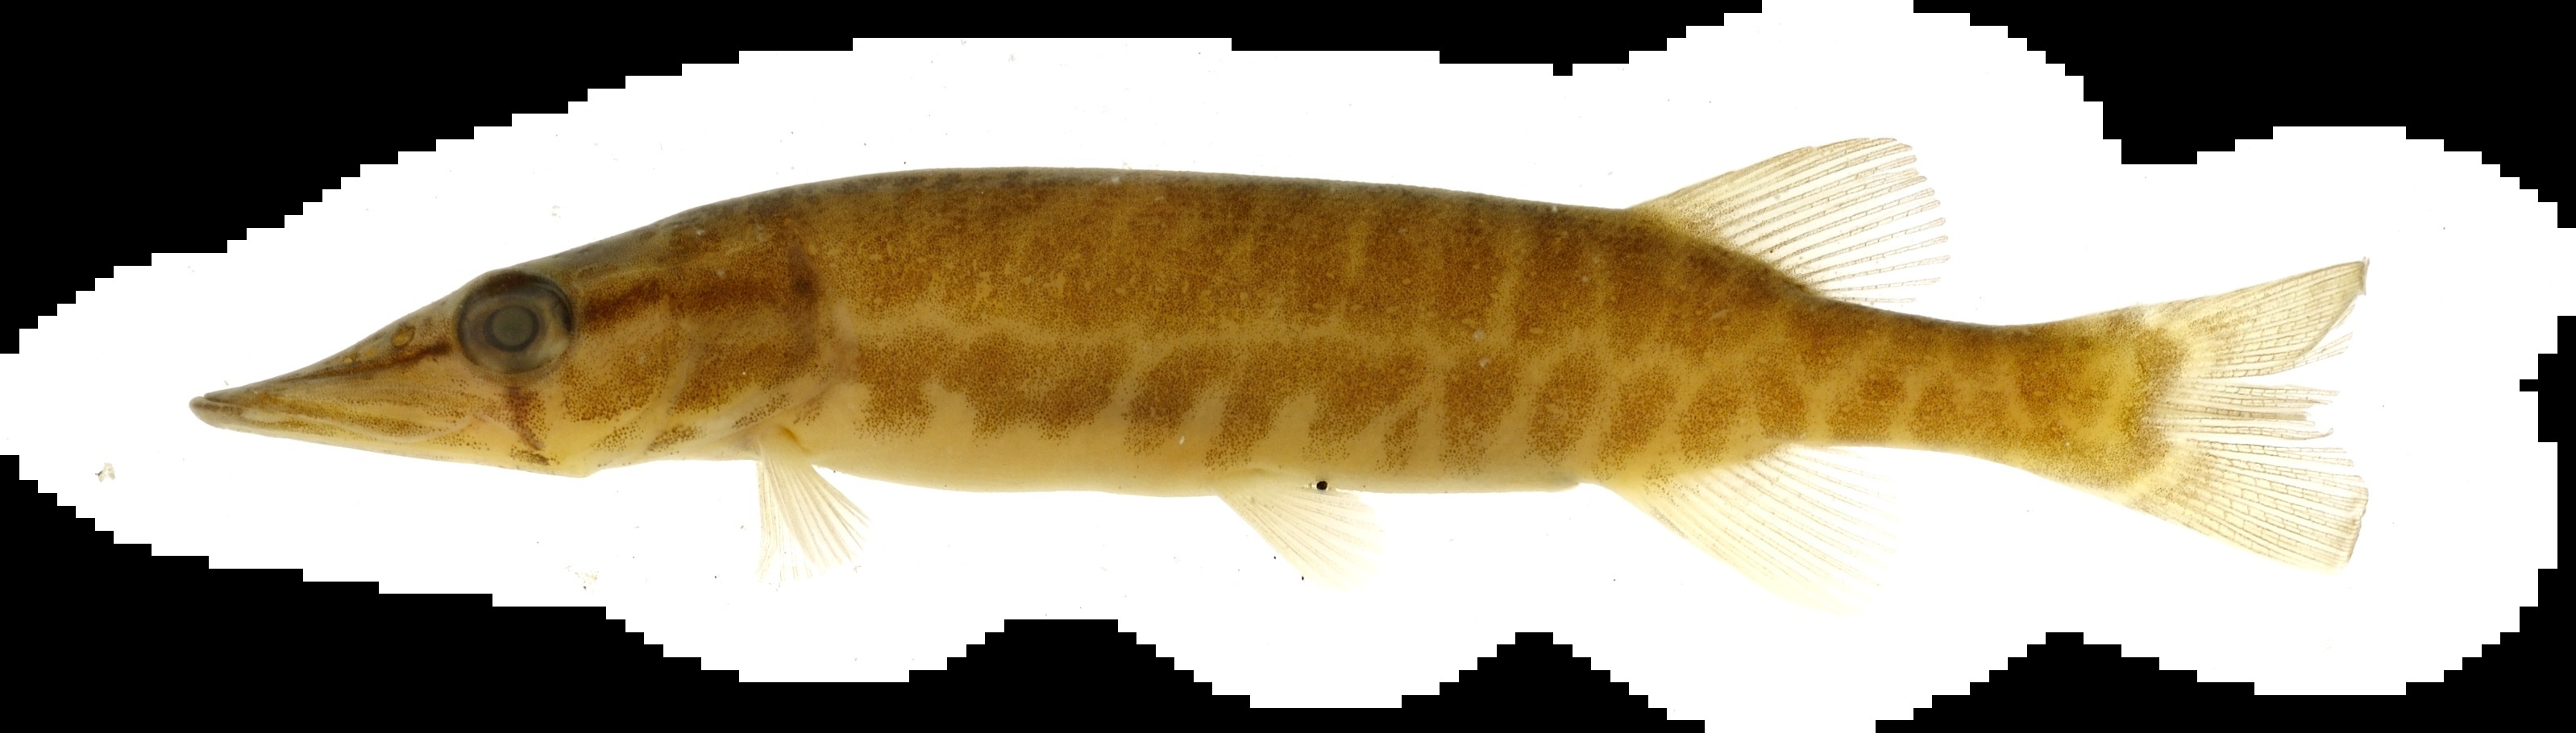

In [33]:
Image(filename=os.path.join("../../data/INHS_segmented_padded_fish/images/",goodComplement))

In [34]:
moige[(moige.scientificName==badSci) & (moige.image_quality>9)]

id  height  width  \
INHS_FISH_14642.jpg  6f95ef90-3f32-4eda-b6d2-8c4732bdb4f6    4016   6016   
INHS_FISH_15413.jpg  07504823-2934-41f3-9f11-21feeb6b497a    4016   6016   
INHS_FISH_16478.jpg  4d9f10b5-bee2-406b-a7ed-ec17edcea0f4    4016   6016   
INHS_FISH_16942.jpg  0a7ee89a-d9ee-41ec-bd79-added1690cdd    4016   6016   
INHS_FISH_17941.jpg  24044de0-5414-45ae-9a4f-bee7d830fcd4    4016   6016   
INHS_FISH_18432.jpg  63bdc839-a3c6-4932-891e-ffff34424d9f    4016   6016   
INHS_FISH_18903.jpg  ffa3e9bc-bb5a-4181-906a-4a41207e994a    4016   6016   
INHS_FISH_20066.jpg  702d2b48-bb05-47aa-bce0-efba10deea29    4016   6016   
INHS_FISH_30511.jpg  70d79d4d-3624-4d94-90b7-ada75b87a76b    4016   6016   
INHS_FISH_38306.jpg  f20c9699-36b4-4df1-b776-6e35401a67f9    4016   6016   
INHS_FISH_41334.jpg  36e686ec-0627-41f4-8951-f3637f463614    4016   6016   
INHS_FISH_42444.jpg  37ec79b8-d01f-43ce-9155-b5161f5250f4    4016   6016   
INHS_FISH_43170.jpg  cdab1334-d638-4f83-ae85-b88178e2a16b    4016   6016   
INHS_FISH_62981.jpg  139a6346-2a17-4951-91ab-d352aaf20556    4016   6016   
INHS_FISH_74471.jpg  2360738d-bf65-4427-82fb-dde35350dd9e    4016   6016   
INHS_FISH_74482.jpg  20820c9f-9e92-4d50-ba82-0464aeab6cb7    4016   6016   
INHS_FISH_81475.jpg  1c46e5d8-f7cd-4cff-8b37-92bb788c416e    4016   6016   
INHS_FISH_82081.jpg  418e83d6-4d22-4b08-9b3b-c566a2498457    4016   6016   
INHS_FISH_88252.jpg  9ff01165-211f-4718-95b8-1658455f7fb7    4016   6016   
INHS_FISH_97992.jpg  574c6608-4f8e-4e20-bb81-375ca1b42566    4016   6016   
INHS_FISH_98105.jpg  3e3cc15f-8c05-46bd-927a-a50eb68c051d    4016   6016   
INHS_FISH_9830.jpg   02751530-53e2-4576-97cf-f0d3f7d4e690    4016   6016   
INHS_FISH_98392.jpg  315afecc-ba36-4d2e-a50f-496c2a7e944c    4016   6016   
INHS_FISH_98495.jpg  5fcb8d43-9e12-4fe4-9fae-e6219777888b    4016   6016   
INHS_FISH_98733.jpg  d8a85dbf-ca9c-4f79-be2b-47021eac1406    4016   6016   
INHS_FISH_98960.jpg  70eac35a-a36c-41ac-a923-41d5e3791510    4016   6016   

                     if_fish  if_ruler  if_colorbar  \
INHS_FISH_14642.jpg      1.0       1.0          0.0   
INHS_FISH_15413.jpg      1.0       1.0          0.0   
INHS_FISH_16478.jpg      1.0       1.0          0.0   
INHS_FISH_16942.jpg      1.0       1.0          0.0   
INHS_FISH_17941.jpg      1.0       1.0          0.0   
INHS_FISH_18432.jpg      1.0       1.0          0.0   
INHS_FISH_18903.jpg      1.0       1.0          0.0   
INHS_FISH_20066.jpg      1.0       1.0          0.0   
INHS_FISH_30511.jpg      1.0       1.0          0.0   
INHS_FISH_38306.jpg      1.0       1.0          0.0   
INHS_FISH_41334.jpg      1.0       1.0          0.0   
INHS_FISH_42444.jpg      1.0       1.0          0.0   
INHS_FISH_43170.jpg      1.0       1.0          0.0   
INHS_FISH_62981.jpg      1.0       1.0          0.0   
INHS_FISH_74471.jpg      1.0       1.0          0.0   
INHS_FISH_74482.jpg      1.0       1.0          0.0   
INHS_FISH_81475.jpg      1.0       1.0          0.0   
INHS_FISH_82081.jpg      1.0       1.0          0.0   
INHS_FISH_88252.jpg      1.0       1.0          0.0   
INHS_FISH_97992.jpg      1.0       1.0          0.0   
INHS_FISH_98105.jpg      1.0       1.0          0.0   
INHS_FISH_9830.jpg       1.0       1.0          0.0   
INHS_FISH_98392.jpg      1.0       1.0          0.0   
INHS_FISH_98495.jpg      1.0       1.0          0.0   
INHS_FISH_98733.jpg      1.0       1.0          0.0   
INHS_FISH_98960.jpg      1.0       1.0          0.0   

                                 relative_path  fish_number  \
INHS_FISH_14642.jpg  /INHS/INHS_FISH_14642.jpg            1   
INHS_FISH_15413.jpg  /INHS/INHS_FISH_15413.jpg            1   
INHS_FISH_16478.jpg  /INHS/INHS_FISH_16478.jpg            1   
INHS_FISH_16942.jpg  /INHS/INHS_FISH_16942.jpg            1   
INHS_FISH_17941.jpg  /INHS/INHS_FISH_17941.jpg            1   
INHS_FISH_18432.jpg  /INHS/INHS_FISH_18432.jpg            1   
INHS_FISH_18903.jpg  /INHS/INHS_FISH_18903.jpg            1   
INHS_FISH_20

In [35]:
#moige.groupby('highiq').apply(lambda x: x.sample(32,replace=False))


#moige.groupby('Genus').apply(lambda x: x.sample(int(len(x)*sample_size/nrows)))
sample_size = 140
nrows=len(moige[moige.lowiq == True])
lowsamples=moige[(moige.lowiq == True) & (moige.Genus != 'Morone')& (moige.Genus != 'Oncorhynchus')].groupby('Genus').apply(lambda x: x.sample(int(len(x)*sample_size/nrows)))

In [36]:
lowsamples.reset_index(drop=True)

id  height  width  if_fish  if_ruler  \
0    e11d706c-e33e-4796-a6a5-5ffd6f765867    4016   6016      1.0       1.0   
1    9f1e7a80-7c16-4542-b970-6a69a6f7c6d4    4016   6016      1.0       1.0   
2    cb75a141-8cb9-4d8e-843a-c1d07aa97387    4016   6016      1.0       1.0   
3    168625bf-b608-411e-bd49-d57b60be90cb    4016   6016      1.0       1.0   
4    2dc4ab17-c1fb-4c14-b9be-c865096f2373    4016   6016      1.0       1.0   
..                                    ...     ...    ...      ...       ...   
123  e0606983-57ef-49a1-8ac8-522b8d1ca83c    4016   6016      1.0       1.0   
124  99699691-3fbf-458a-96f6-d37606261f1e    4016   6016      1.0       1.0   
125  58f08bd9-31cb-4d75-9aee-e204c6ef80cb    4016   6016      1.0       1.0   
126  e6f1cafb-02ce-4745-a24d-4c385d79239e    4016   6016      1.0       1.0   
127  d7bb1322-e9a6-45e3-8ffc-037724484ab8    4016   6016      1.0       1.0   

     if_colorbar               relative_path  fish_number  \
0            0.0   /INHS/INHS_FISH_98711.jpg            1   
1            0.0   /INHS/INHS_FISH_97283.jpg            1   
2            0.0   /INHS/INHS_FISH_98160.jpg            1   
3            0.0  /INHS/INHS_FISH_99127B.jpg            1   
4            0.0   /INHS/INHS_FISH_99097.jpg            1   
..           ...                         ...          ...   
123          0.0   /INHS/INHS_FISH_98072.jpg            1   
124          0.0   /INHS/INHS_FISH_58877.jpg            1   
125          0.0   /INHS/INHS_FISH_73656.jpg            1   
126          0.0   /INHS/INHS_FISH_98140.jpg            1   
127          0.0   /INHS/INHS_FISH_98740.jpg            1   

    non_specimen_objects  if_label  if_overlapping specimen_angle  \
0                     no       1.0            -0.0            NaN   
1                     no       1.0            -0.0            NaN   
2             twine, tag       1.0            -1.0            NaN   
3            twine, tags       1.0            -1.0            NaN   
4            twine, tags       1.0            -1.0            NaN   
..                   ...       ...             ...            ...   
123                   no       1.0            -0.0            NaN   
124                   no       1.0            -0.0            NaN   
125                   no       1.0            -0.0            NaN   
126                   no       1.0            -0.0            NaN   
127                   no       1.0            -0.0            NaN   

    specimen_view  if_bent  landmark_failures_number  if_missing_parts  \
0             NaN     -1.0                       NaN              -0.0   
1             NaN     -0.0                       NaN              -0.0   
2             NaN     -0.0                       NaN              -0.0   
3             NaN     -0.0                       NaN              -0.0   
4             NaN     -0.0                       NaN              -0.0   
..            ...      ...                       ...               ...   
123           NaN     -0.0                       NaN              -0.0   
124           NaN     -0.0                       NaN              -0.0   
125           NaN     -0.0                       NaN              -0.0   
126           NaN     -0.0                       NaN              -0.0   
127           NaN     -0.0                       NaN              -0.0   

    brightness  if_blur  if_color_issue  checked_flag  specimen_angled  \
0       normal      1.0             NaN          True                9   
1       normal      1.0             NaN          True                9   
2       normal      1.0             NaN          True                2   
3       normal      1.0             NaN          True                9   
4       normal      1.0             NaN          True                3   
..         ...      ...             ...           ...              ...   
123     normal      1.0             NaN          True                9   
124     normal      1.0             NaN        

Let's sample the high-quality images using the genus counts in the low quality images to ensure a fair comparison

In [37]:
#highsamples=moige[moige.highiq == True].groupby('Genus').apply(lambda x: \
#        x.sample(len(lowsamples[lowsamples['Genus']==x['Genus']])))

highsamples=moige[moige.highiq == True].groupby('Genus').apply(lambda x: \
        x.sample(int(sum(lowsamples.Genus==x.Genus.iloc[0]))))
#    /nrows)*total_sample_size)

#.groupby('Genus','highiq').agg(count=('id','size'))

In [38]:
highsamples.reset_index(drop=True).groupby('Genus').size()


Genus
Cyprinus        2
Esox            8
Gambusia        6
Lepomis        40
Neogobius       1
Notropis       49
Noturus        17
Phenacobius     5
dtype: int64

In [39]:
lowsamples.reset_index(drop=True).groupby('Genus').size()

Genus
Cyprinus        2
Esox            8
Gambusia        6
Lepomis        40
Neogobius       1
Notropis       49
Noturus        17
Phenacobius     5
dtype: int64

In [40]:
lowsamples.reset_index(drop=True).groupby('Genus').size().sum()

128

In [41]:
highsamples.reset_index(drop=True).groupby('Genus').size().sum()

128

In [42]:
highids=highsamples.reset_index(drop=True)['id']
lowids=lowsamples.reset_index(drop=True)['id']

In [43]:
highids

0      4677bbf2-c07b-4326-bb29-6ab446dd7e31
1      6620545b-0915-4701-b08a-e3513e88eada
2      f20c9699-36b4-4df1-b776-6e35401a67f9
3      9a5111a5-cf35-4f40-a4cc-47962616cc5b
4      70eac35a-a36c-41ac-a923-41d5e3791510
                       ...                 
123    7b541ed5-05a1-4d9b-b2d6-3122d70a4bf1
124    b1b05064-d459-4766-a29a-a35a96217372
125    f7be5cc0-f73d-47ee-bcda-a0298e49babc
126    f2c3adac-5f11-448a-8356-9a0cea68e9df
127    b3f12714-0111-4b64-b687-b25d2edf01a1
Name: id, Length: 128, dtype: object

In [44]:
lowids

0      e11d706c-e33e-4796-a6a5-5ffd6f765867
1      9f1e7a80-7c16-4542-b970-6a69a6f7c6d4
2      cb75a141-8cb9-4d8e-843a-c1d07aa97387
3      168625bf-b608-411e-bd49-d57b60be90cb
4      2dc4ab17-c1fb-4c14-b9be-c865096f2373
                       ...                 
123    e0606983-57ef-49a1-8ac8-522b8d1ca83c
124    99699691-3fbf-458a-96f6-d37606261f1e
125    58f08bd9-31cb-4d75-9aee-e204c6ef80cb
126    e6f1cafb-02ce-4745-a24d-4c385d79239e
127    d7bb1322-e9a6-45e3-8ffc-037724484ab8
Name: id, Length: 128, dtype: object

In [45]:
meta

fileName         Family        Genus  \
0       INHS_FISH_20096.JPG      Clupeidae        Alosa   
1       INHS_FISH_38236.JPG      Clupeidae        Alosa   
2       INHS_FISH_38418.JPG      Clupeidae        Alosa   
3       INHS_FISH_38440.JPG      Clupeidae        Alosa   
4       INHS_FISH_38781.JPG      Clupeidae        Alosa   
...                     ...            ...          ...   
23083   INHS_FISH_60802.jpg    Leuciscidae    Semotilus   
23084   INHS_FISH_65283.jpg    Leuciscidae    Semotilus   
23085  INHS_FISH_107123.jpg    Leuciscidae    Semotilus   
23086   INHS_FISH_66322.jpg  Triportheidae  Triportheus   
23087   INHS_FISH_85634.jpg       Umbridae        Umbra   

                scientificName catalogNumber  fixedCatalogNumber  fileexists  
0               Alosa alabamae         20096               20096        True  
1               Alosa alabamae         38236               38236        True  
2               Alosa alabamae         38418               38418        True  
3               Alosa alabamae         38440               38440        True  
4               Alosa alabamae         38781               38781        True  
...                        ...           ...                 ...         ...  
23083  Semotilus atromaculatus         60802               60802        True  
23084  Semotilus atromaculatus         65283               65283        True  
23085  Semotilus atromaculatus        107123              107123        True  
23086        Triportheus albus         66322               66322        True  
23087               Umbra limi         85634               85634        True  

[23088 rows x 7 columns]

In [46]:
#fileName	scientificName	Genus	Family
#INHS_FISH_59772.jpg	Lepomis cyanellus	Lepomis	Centrarchidae
moige['fileName']=moige.index
moige=moige.set_index('id')

In [47]:
moige.loc[highids][['fileName','scientificName','Family','Genus']].reset_index(drop=True).to_csv('../../high_qual_metadata.tsv',sep="\t",index=False)
moige.loc[lowids][['fileName','scientificName','Family','Genus']].reset_index(drop=True).to_csv('../../low_qual_metadata.tsv',sep="\t",index=False)
